## Modeling

In [1]:
#pip install shap

### Imports

In [1]:
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O
import numpy as np # data structures, mathematical functions
import matplotlib.pyplot as plt # data visulation and ploting
import seaborn as sns # data visulation and ploting

import pycaret
from pycaret.classification import *

### Load The Credit Card Data

In [2]:
credit_data = pd.read_csv('credit_data_eda.csv')

In [3]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37097 entries, 0 to 37096
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   AcountNumber               37097 non-null  int64  
 1   CVV                        37097 non-null  int64  
 2   CustomerAge                37097 non-null  float64
 3   Gender                     37097 non-null  object 
 4   MaritalStatus              37097 non-null  object 
 5   CardColour                 37097 non-null  object 
 6   CardType                   37097 non-null  object 
 7   Domain                     37097 non-null  object 
 8   Amount                     37097 non-null  float64
 9   AverageIncomeExpendicture  37097 non-null  int64  
 10  Outcome                    37097 non-null  int64  
 11  Customer_City_Address      37097 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 3.4+ MB


In [4]:
classify = setup(data = credit_data, target = 'Outcome', fix_imbalance = True)

,Description,Value
0,Session id,5083
1,Target,Outcome
2,Target type,Binary
3,Original data shape,"(37097, 12)"
4,Transformed data shape,"(49446, 24)"
5,Transformed train set shape,"(38316, 24)"
6,Transformed test set shape,"(11130, 24)"
7,Ordinal features,3
8,Numeric features,5
9,Categorical features,6


In [5]:
grad_boost = create_model('gbc', n_estimators=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8610,0.9461,0.8580,0.9486,0.9011,0.6694,0.6790
1,0.8602,0.9437,0.8445,0.9614,0.8991,0.6746,0.6898
2,0.8629,0.9462,0.8544,0.9551,0.9019,0.6766,0.6883
3,0.8552,0.9452,0.8445,0.9540,0.8959,0.6611,0.6745
4,0.8606,0.9420,0.8455,0.9609,0.8995,0.6751,0.6900
5,0.8629,0.9460,0.8513,0.9583,0.9016,0.6783,0.6913
6,0.8583,0.9440,0.8513,0.9516,0.8986,0.6657,0.6772
7,0.8617,0.9488,0.8496,0.9582,0.9006,0.6760,0.6893
8,0.8640,0.9457,0.8486,0.9627,0.9020,0.6827,0.6974


In [6]:
random_forest = create_model('rf', n_estimators=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8587,0.9427,0.8831,0.9221,0.9022,0.6483,0.6502
1,0.8506,0.9393,0.8794,0.9148,0.8968,0.6269,0.6285
2,0.8618,0.9475,0.8841,0.9252,0.9042,0.6565,0.6587
3,0.8579,0.9440,0.8784,0.9252,0.9012,0.6489,0.6517
4,0.8537,0.9427,0.8841,0.9147,0.8992,0.6330,0.6342
5,0.8518,0.9370,0.8716,0.9232,0.8966,0.6353,0.6386
6,0.8568,0.9454,0.8815,0.9209,0.9008,0.6436,0.6456
7,0.8571,0.9444,0.8883,0.9155,0.9017,0.6404,0.6414
8,0.8663,0.9459,0.8841,0.9312,0.9070,0.6698,0.6727


In [7]:
light_gb = create_model('lightgbm', n_estimators=100)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8648,0.9504,0.8742,0.9384,0.9052,0.6711,0.6762
1,0.8568,0.9424,0.8612,0.9396,0.8987,0.6559,0.6632
2,0.8645,0.9485,0.8674,0.9443,0.9042,0.6738,0.6809
3,0.8675,0.9462,0.8674,0.9486,0.9062,0.6823,0.6903
4,0.8664,0.9431,0.8711,0.9435,0.9058,0.6771,0.6836
5,0.8552,0.9402,0.8617,0.9370,0.8978,0.6512,0.6580
6,0.8606,0.9467,0.8669,0.9395,0.9017,0.6633,0.6697
7,0.8717,0.9511,0.8752,0.9469,0.9096,0.6898,0.6962
8,0.8525,0.9463,0.8533,0.9412,0.8951,0.6486,0.6575


In [8]:
tuned_gb = tune_model(grad_boost, optimize = 'AUC')
tuned_rf = tune_model(random_forest, optimize = 'AUC')
tuned_lgb = tune_model(light_gb, optimize = 'AUC')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8587,0.9457,0.8659,0.9378,0.9004,0.6585,0.6648
1,0.8525,0.9417,0.8533,0.9413,0.8952,0.6486,0.6575
2,0.8625,0.9466,0.8627,0.9462,0.9025,0.6710,0.6793
3,0.8614,0.9434,0.8638,0.9436,0.9019,0.6672,0.6749
4,0.8625,0.9406,0.8601,0.9488,0.9023,0.6725,0.6817
5,0.8606,0.9463,0.8580,0.9481,0.9008,0.6683,0.6778
6,0.8610,0.9463,0.8680,0.9390,0.9021,0.6638,0.6699
7,0.8656,0.9498,0.8627,0.9505,0.9045,0.6795,0.6886
8,0.8609,0.9459,0.8574,0.9491,0.9010,0.6696,0.6794


Fitting 10 folds for each of 10 candidates, totalling 100 fits


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8679,0.9435,0.8617,0.9549,0.9059,0.6864,0.6967
1,0.8610,0.9420,0.8366,0.9709,0.8988,0.6808,0.7003
2,0.8637,0.9437,0.8533,0.9573,0.9023,0.6793,0.6917
3,0.8614,0.9413,0.8554,0.9518,0.9010,0.6719,0.6826
4,0.8579,0.9383,0.8533,0.9489,0.8986,0.6635,0.6740
5,0.8575,0.9405,0.8450,0.9569,0.8975,0.6671,0.6811
6,0.8606,0.9443,0.8460,0.9603,0.8996,0.6748,0.6894
7,0.8617,0.9481,0.8465,0.9614,0.9003,0.6776,0.6924
8,0.8590,0.9419,0.8475,0.9564,0.8987,0.6698,0.6831


Fitting 10 folds for each of 10 candidates, totalling 100 fits
Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8664,0.9478,0.8622,0.9522,0.9050,0.6819,0.6915
1,0.8598,0.9461,0.8445,0.9608,0.8989,0.6736,0.6887
2,0.8629,0.9475,0.8502,0.9594,0.9015,0.6789,0.6924
3,0.8610,0.9452,0.8549,0.9518,0.9007,0.6711,0.6819
4,0.8579,0.9412,0.8617,0.9407,0.8995,0.6588,0.6662
5,0.8583,0.9462,0.8450,0.9580,0.8979,0.6692,0.6834
6,0.8618,0.9491,0.8424,0.9659,0.8999,0.6799,0.6967
7,0.8686,0.9519,0.8454,0.9730,0.9047,0.6966,0.7147
8,0.8652,0.9477,0.8480,0.9649,0.9027,0.6861,0.7014


Fitting 10 folds for each of 10 candidates, totalling 100 fits


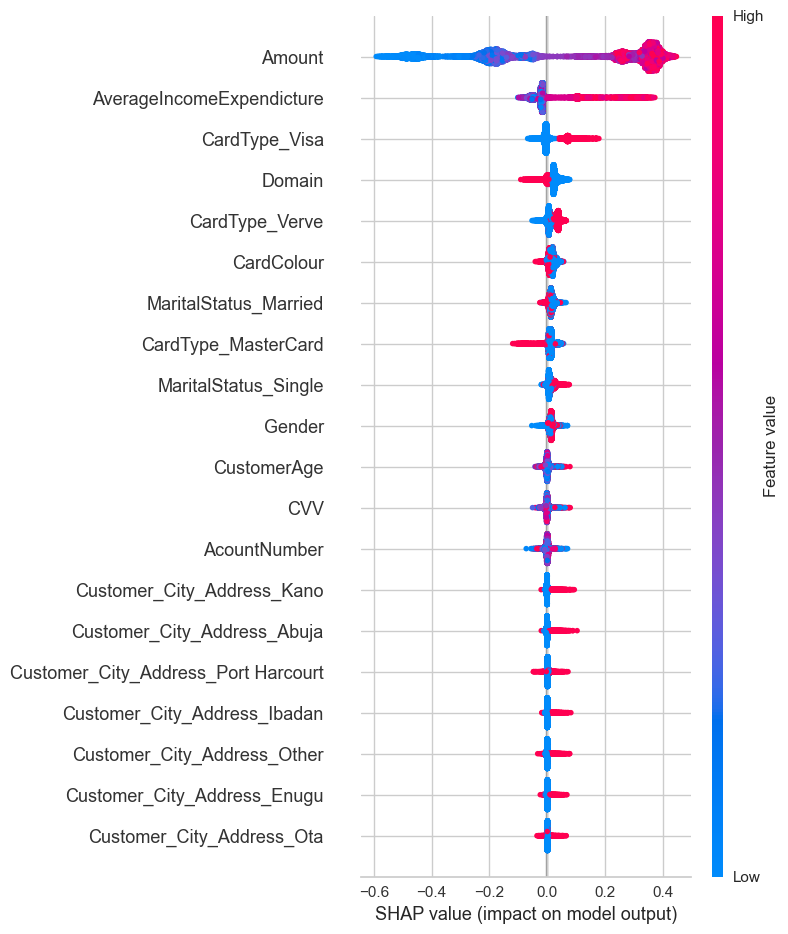

In [9]:
interpret_model(tuned_rf)

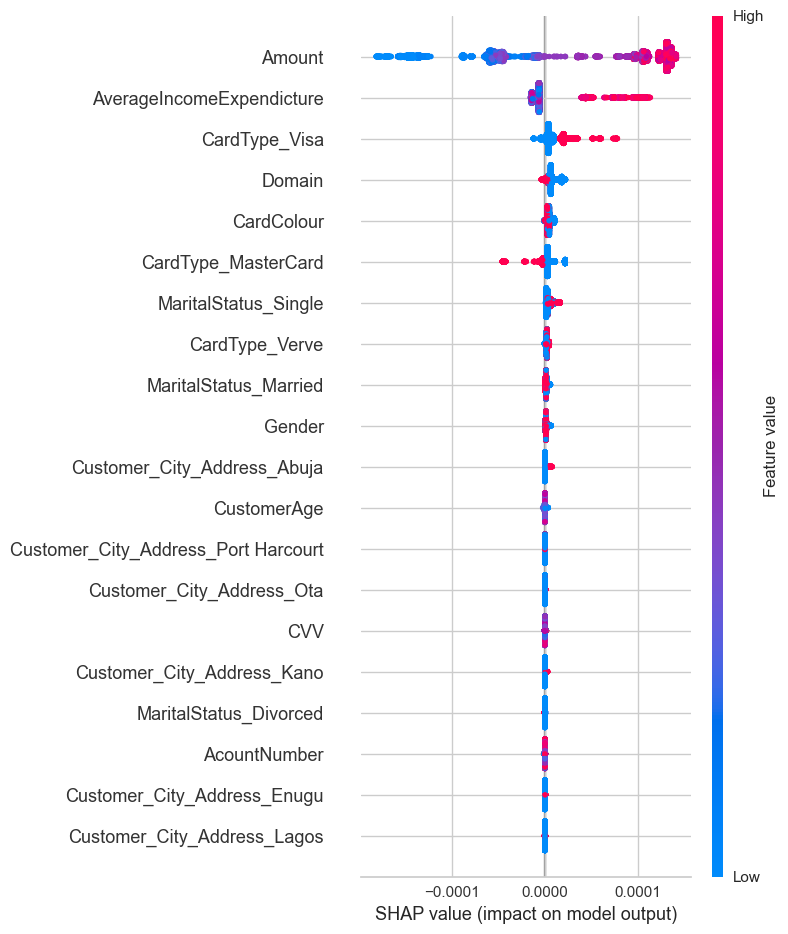

In [10]:
interpret_model(tuned_lgb)

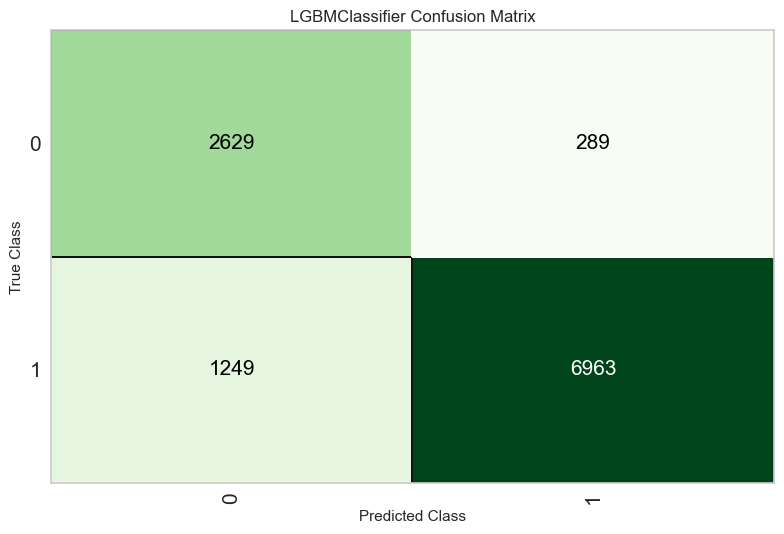

In [11]:
plot_model(tuned_lgb, plot = 'confusion_matrix')

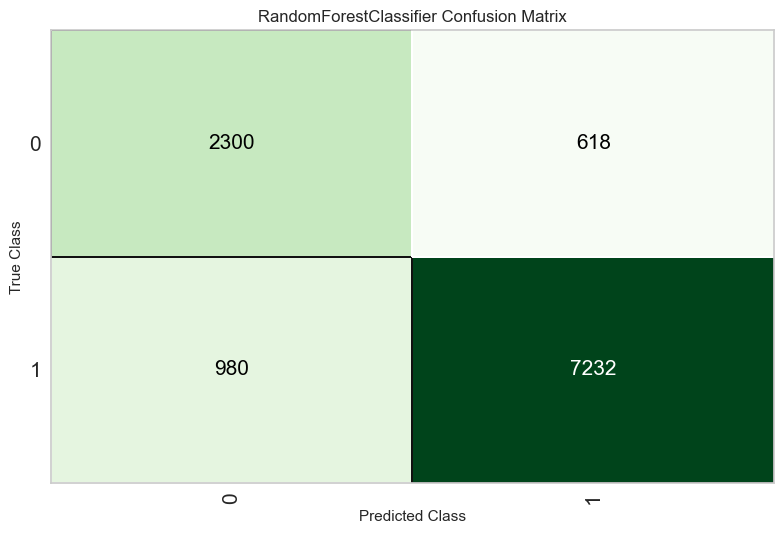

In [12]:
plot_model(tuned_rf, plot = 'confusion_matrix')

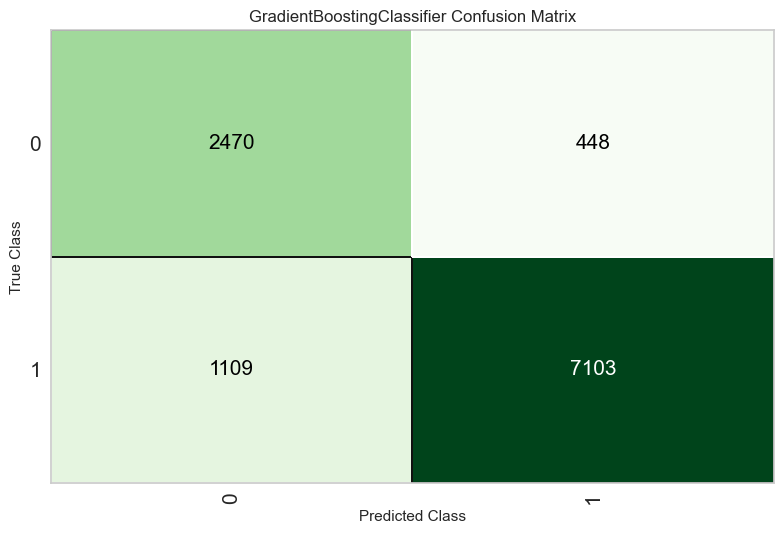

In [13]:
plot_model(tuned_gb, plot = 'confusion_matrix')

In [14]:
pred = predict_model(tuned_gb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.8601,0.9455,0.8650,0.9407,0.9012,0.6630,0.6699


In [15]:
predlgb = predict_model(tuned_lgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Light Gradient Boosting Machine,0.8618,0.9459,0.8479,0.9601,0.9005,0.6771,0.6913


In [16]:
predrf = predict_model(tuned_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.8564,0.9432,0.8807,0.9213,0.9005,0.6432,0.6453


In [17]:
save_model(tuned_lgb, model_name="deployment_gb")

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=FastMemory(location=/var/folders/m3/xf6gvy7n3qdbcwzd5vjb0b7r0000gn/T/joblib),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['AcountNumber', 'CVV',
                                              'CustomerAge', 'Amount',
                                              'AverageIncomeExpendicture'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_features=False,
                                                               missing_values=na...
                                 colsample_bytree=1.0, feature_fraction=0.8,
                                 importance_type='split', learning_rate=1e-06,
                               

In [20]:
m = load_model('deployment_gb')
m

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/var/folders/m3/xf6gvy7n3qdbcwzd5vjb0b7r0000gn/T/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['AcountNumber', 'CVV',
                                             'CustomerAge', 'Amount',
                                             'AverageIncomeExpendicture'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_features=False,
                                                              missing_values=na...
                                colsample_bytree=1.0, feature_fraction=0.8,
                                importance_type='split', learning_rate=1e-06,
                                max_depth=-1, min_child_samples=1,
                                min_child_weight=0.001, min_split_gain=0.9,
                                n_estimators=90, n_jobs=-1, num_leaves=30,
                                objective=None, random_state=5083,
                                reg_alpha=0.0001, reg_lambda=0.4, silent='warn',
                                subsample=1.0, subsample_for_bin=200000,
                                subsample_freq=0))],
         verbose=False)